# Project : WeRateDog's Twitter Account Data Analysis and Visualization   

### Introduction
> After the raw data have been gathered and cleaned. I wanted to analyze the data by visualize the relationship between the data point. I will be using the twitter_archive_master.csv.

In [14]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import seaborn as sns 
sns.set(style="darkgrid")

In [3]:
df = pd.read_csv('twitter_archive_master.csv')

In [4]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,breed,confidence,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,none,none,0,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,none,Chihuahua,32,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,none,Chihuahua,71,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,none,Labrador_retriever,16,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,none,basset,55,9774,41048


### Rating

In [6]:
df[['rating_numerator', 'retweet_count', 'favorite_count', 'confidence']].describe()

,rating_numerator,retweet_count,favorite_count,confidence
count,1949.000000,1949.000000,1949.000000,1949.000000
mean,10.538225,2784.492560,8972.254489,46.119548
std,2.174663,4709.940601,12313.964625,33.832153
min,0.000000,16.000000,81.000000,0.000000
25%,10.000000,624.000000,1957.000000,14.000000
50%,11.000000,1360.000000,4144.000000,46.000000
75%,12.000000,3240.000000,11416.000000,77.000000
max,14.000000,79515.000000,132810.000000,99.000000


Text(0.5, 1.0, "WeRateDog's Rating")

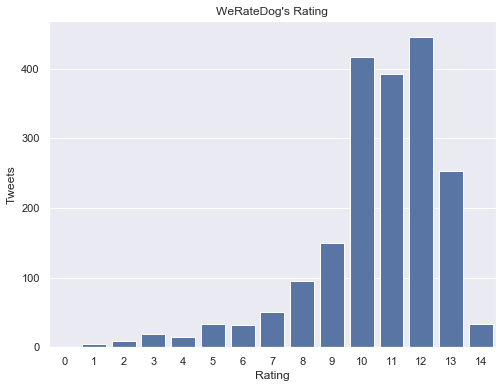

In [10]:
plt.figure(figsize=[8,6])
sns.set(style = "darkgrid")
base_color= sns.color_palette()[0]
ax = sns.countplot(data=df,x='rating_numerator',color=base_color)
ax.set_ylabel('Tweets')
ax.set_xlabel('Rating')
ax.set_title('WeRateDog\'s Rating')

> The ditribution of WeRateDog's Twitter acoount rating is skewed to the left with 75% of all the rating are between 10 to 12. 

### Dog breed 

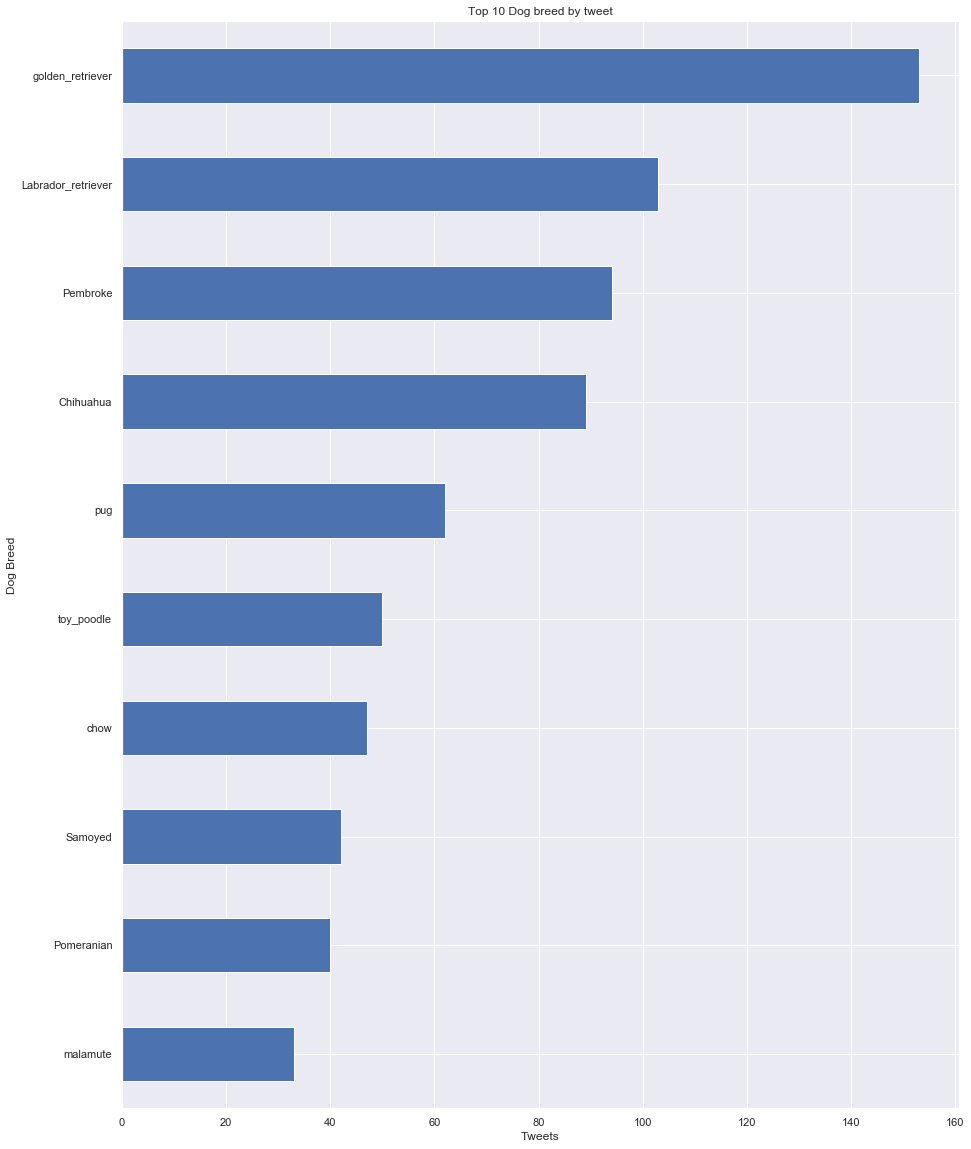

In [12]:
plt.figure(figsize=[15,20])
sns.set(style = "darkgrid")
base_color= sns.color_palette()[0]
dog_breed_top_10 = df.breed.value_counts()[1:11].sort_values()
dog_breed_top_10.plot(kind = 'barh', color=base_color)
plt.title('Top 10 Dog breed by tweet')
plt.xlabel('Tweets')
plt.ylabel('Dog Breed');

> With almost 160 tweet, golden retriever has won the WeRateDog's twitter account followed by Labrador at around 110.  

### The relationship between favorite and retweet counts with dog rating

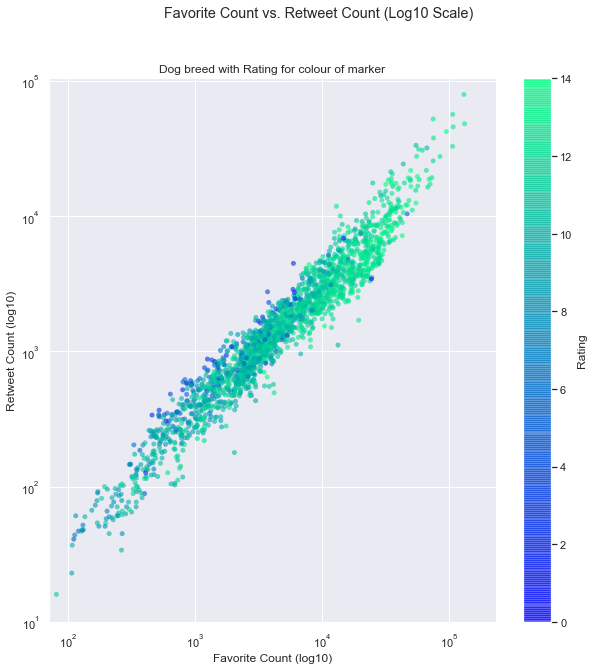

In [21]:
cmap = cm.get_cmap('winter')
plt.figure(figsize = (10, 10))

plt.xscale('log')
plt.yscale('log')
plt.xlim(df['favorite_count'].min() - 10, df['favorite_count'].max() + 100000)
plt.ylim(10, df['retweet_count'].max() + 25000)
colours = df['rating_numerator']
markers = 25

plt.scatter(df['favorite_count'], df['retweet_count'], 
            c = colours, s = markers, cmap = cmap, edgecolor = 'None', alpha = 0.6)

# title and labels
plt.suptitle('Favorite Count vs. Retweet Count (Log10 Scale)')
plt.title('Dog breed with Rating for colour of marker')
plt.xlabel('Favorite Count (log10)')
plt.ylabel('Retweet Count (log10)')

# colour bar
cbar = plt.colorbar()
cbar.set_label('Rating')

plt.show();

#source: ttps://stackoverflow.com/questions/25741214/how-to-use-colormaps-to-color-plots-of-pandas-dataframes

> The plot shows a positive correlation between retweet counts and favorite counts. This is practically significant as well as statistically proven because most of the people who likes the picture will also retweet the picture. The datapoint is packed and followed the linear trendline meant as retweet counts increase so does the favorite (likes) increase. Another interesting point on the chart is the significant of the green point meant tweets with high favortie counts and high retweet will also have high rating. 